In [3]:
pip install pandas

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.6 MB 11.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.6 MB 10.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.6 MB 10.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.6 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.6 MB 5.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.6 MB 6.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.6 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/11.6 MB 8.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.6 MB 8.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.6 MB 8.5 MB/s eta 0:00:01
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------  163.8/165.9 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 11.1 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.0 MB 10.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 11.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/8.0 MB 10.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.0 MB 11.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.0 MB 11.6 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.0 MB 11.6 MB/s eta 0:00:01
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./telco_churn.csv')

# EDA

<Axes: xlabel='Churn', ylabel='tenure'>

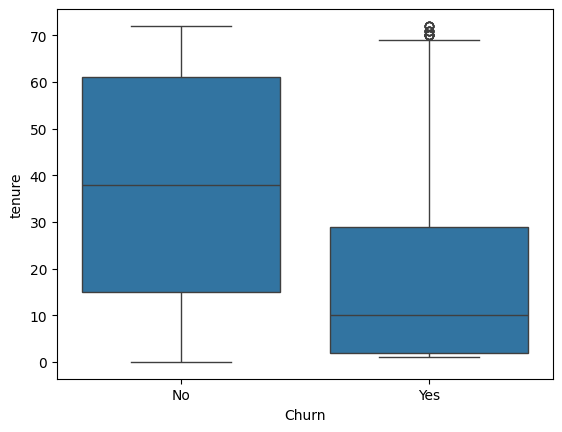

In [9]:
sns.boxplot(data=df, y='tenure', x='Churn')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

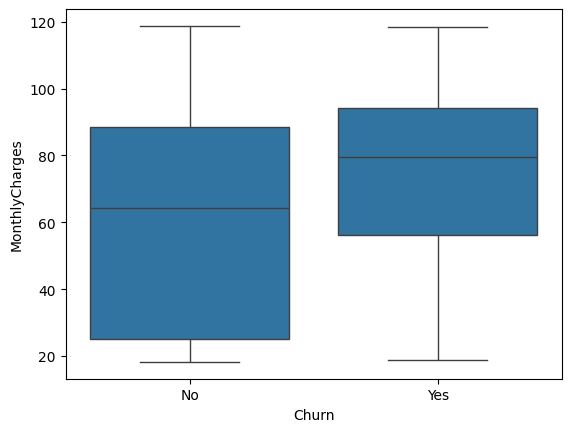

In [10]:
sns.boxplot(data=df, y='MonthlyCharges', x='Churn')

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan,regex=True)
df["TotalCharges"].value_counts()

TotalCharges
20.2      11
19.75      9
19.9       8
19.65      8
20.05      8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

<Axes: xlabel='Churn', ylabel='TotalCharges'>

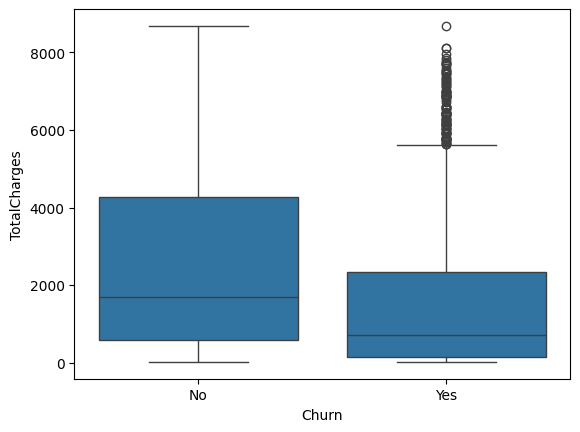

In [13]:
sns.boxplot(data=df, y='TotalCharges', x='Churn')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

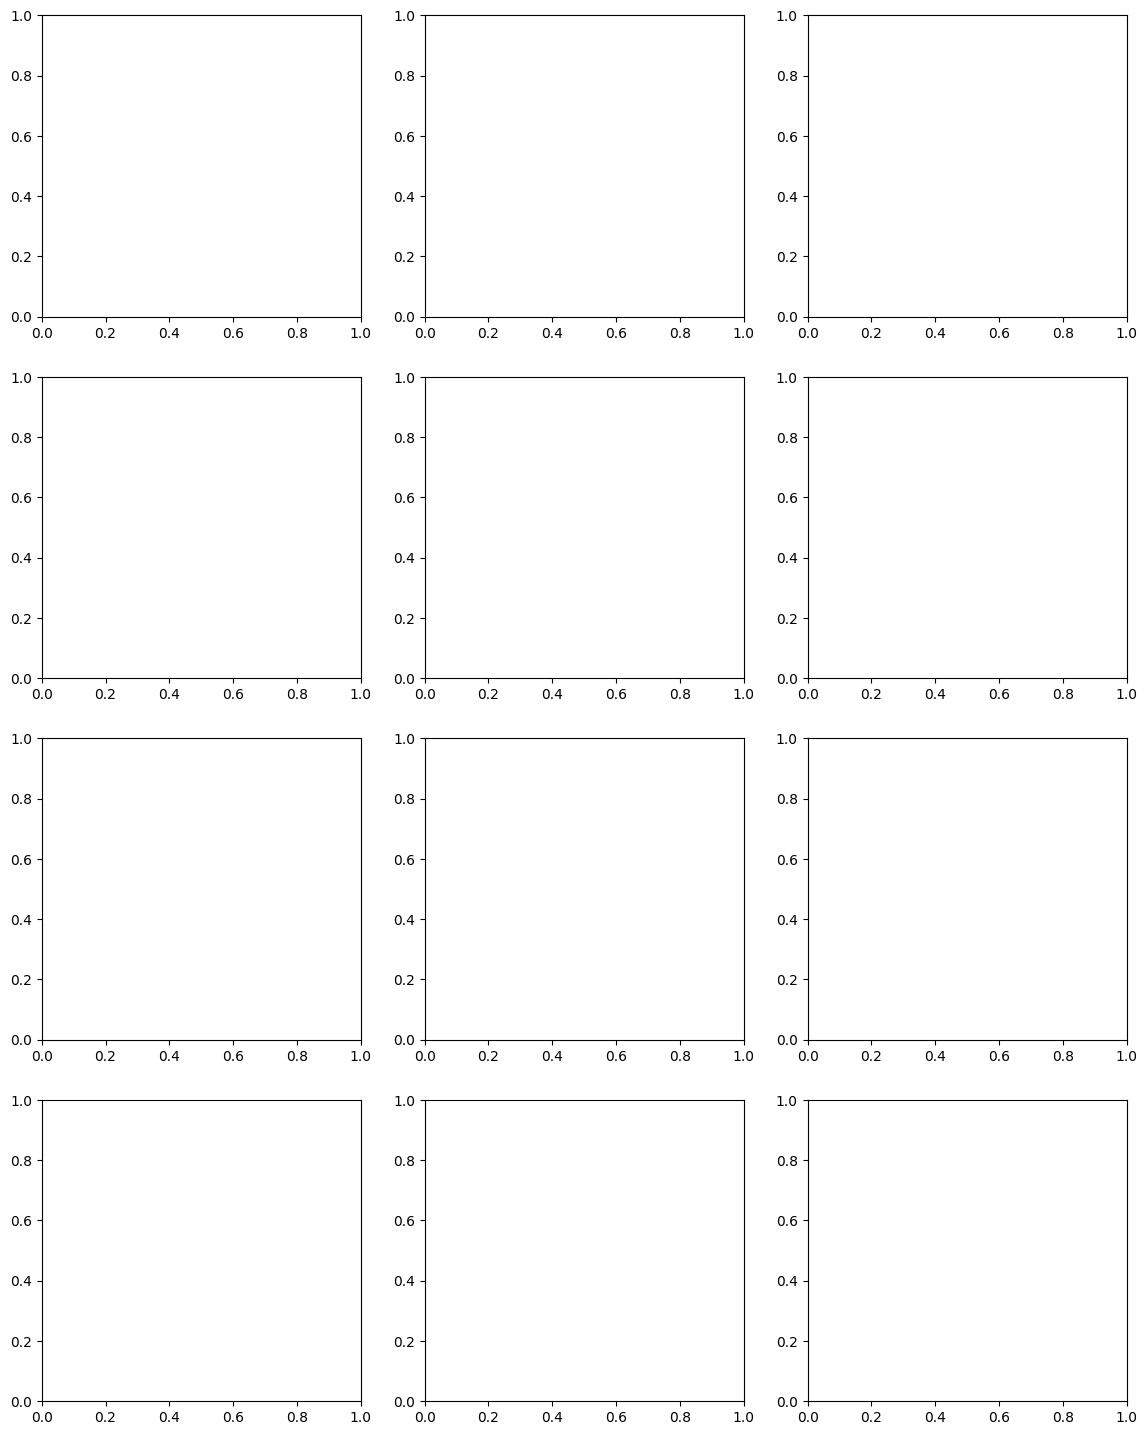

In [16]:
cat = [
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'
]

fig , ax = plt.subplots(4,3,figsize = (14,18))
for i , subplots in zip (df[cat], ax.flatten()):  
  plot = sns.countplot(df[cat][i],hue = 'Churn', ax = subplots, palette = 'BuPu')
  plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1)
plt.show()

# Feature Engineering

In [17]:
def calc_family_size(dataframe):
    if dataframe['Partner']=='Yes' and dataframe['Dependents']=='Yes':
        return 'big_family'
    elif dataframe['Partner']=='Yes' and dataframe['Dependents']=='No':
        return 'no_child'
    elif dataframe['Partner']=='No' and dataframe['Dependents']=='Yes':
        return 'single_parent'
    elif dataframe['Partner']=='No' and dataframe['Dependents']=='No':
        return 'no_family'
    else:
        return 'others'

df['family_size'] = df.apply(calc_family_size, axis=1)

In [18]:
def calc_service_profile(dataframe):

    if (dataframe['MultipleLines'] == 'No phone service') & (dataframe['InternetService'] == 'No'):
        return 'Not a customer'
    elif (dataframe['MultipleLines'] != 'No phone service') & (dataframe['InternetService'] == 'No'):
        return 'only_phone'
    elif (dataframe['MultipleLines'] == 'No phone service') & (dataframe['InternetService'] != 'No'):
        return 'only_internet'
    elif (dataframe['MultipleLines'] != 'No phone service') & (dataframe['InternetService'] != 'No'):
        return 'phone_and_internet'
    else:
        return 'others'

df['service_profile'] = df.apply(calc_service_profile, axis=1)

In [19]:
def calc_customer_service(dataframe):

    if (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'Yes'):
        return 'Full Support'
    elif (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'No'):
        return 'only_phone'
    elif (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'Yes'):
        return 'only_internet'
    elif (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'Yes'):
        return 'phone_and_internet'
    else:
        return 'others'

df['service_profile'] = df.apply(calc_service_profile, axis=1)

In [20]:
def calc_security_level(dataframe):

    if (dataframe['OnlineSecurity'] == 'No internet service') & (dataframe['DeviceProtection'] == 'No internet service'):
        return 'No internet service'
    elif (dataframe['OnlineSecurity'] == 'Yes') & (dataframe['DeviceProtection'] == 'Yes'):
        return 'strong security'
    elif ((dataframe['OnlineSecurity'] == 'No') & (dataframe['DeviceProtection'] == 'Yes') | (dataframe['OnlineSecurity'] == 'Yes') & (dataframe['DeviceProtection'] == 'No')):
        return 'mid security'
    elif (dataframe['OnlineSecurity'] == 'No') & (dataframe['DeviceProtection'] == 'No'):
        return 'no security'
    else:
        return 'others'

df['security_level'] = df.apply(calc_security_level, axis=1)

In [21]:
def calc_streaming_profile(dataframe):

    if (dataframe['StreamingTV'] == 'No internet service') & (dataframe['StreamingMovies'] == 'No internet service'):
        return 'No internet service'
    elif (dataframe['StreamingTV'] == 'Yes') & (dataframe['StreamingMovies'] == 'Yes'):
        return 'Movies and TV'
    elif ((dataframe['StreamingTV'] == 'No') & (dataframe['StreamingMovies'] == 'Yes') | (dataframe['StreamingTV'] == 'Yes') & (dataframe['StreamingMovies'] == 'No')):
        return 'only one'
    elif (dataframe['StreamingTV'] == 'No') & (dataframe['StreamingMovies'] == 'No'):
        return 'no streaming'
    else:
        return 'others'

df['streaming_profile'] = df.apply(calc_streaming_profile, axis=1)

In [22]:
def calc_billing_profile(dataframe):

    if (dataframe['PaymentMethod'] == 'Electronic check'):
        return 'Electronic check'
    elif (dataframe['PaymentMethod'] == 'Mailed check'):
        return 'Mailed check'
    elif (dataframe['PaymentMethod'] == 'Bank transfer (automatic)'):
        return 'Bank transfer (automatic)'
    elif (dataframe['PaymentMethod'] == 'Credit card (automatic)'):
        return 'Credit card (automatic)'
    else:
        return 'PaperlessBilling'

df['billing_profile'] = df.apply(calc_billing_profile, axis=1)

In [23]:
def calc_tenure_cat(dataframe):

    if (dataframe['tenure'] < 3):
        return '[0,3)'
    elif (dataframe['tenure'] < 6):
        return '[3,6)'
    elif (dataframe['tenure'] < 12):
        return '[6,12)'
    elif (dataframe['tenure'] < 24):
        return '[12,24)'
    elif (dataframe['tenure'] < 36):
        return '[24,36)'
    else:
        return '[36,inf)'

df['tenure_cat'] = df.apply(calc_tenure_cat, axis=1)

In [24]:
def calc_monthly_charges_cat(dataframe):

    if (dataframe['MonthlyCharges'] < 20):
        return '[0,20)'
    elif (dataframe['MonthlyCharges'] < 40):
        return '[20,40)'
    elif (dataframe['MonthlyCharges'] < 60):
        return '[40,60)'
    elif (dataframe['MonthlyCharges'] < 80):
        return '[60,80)'
    elif (dataframe['MonthlyCharges'] < 100):
        return '[80,100)'
    else:
        return '[100,inf)'

df['monthly_charges_cat'] = df.apply(calc_monthly_charges_cat, axis=1)

In [36]:
df.iloc[:,20:].to_parquet('./features.parquet')